In [ ]:
#Links zu Tutorials
#BeautifulSoup (Document Parser):
# https://tedboy.github.io/bs4_doc/1_quick_start.html
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser

In [ ]:
!python --version

Python 3.10.12


In [ ]:
#!pip install aiohttp[speedups]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import urllib.request  # we are going to need to generate a Request object
from bs4 import BeautifulSoup

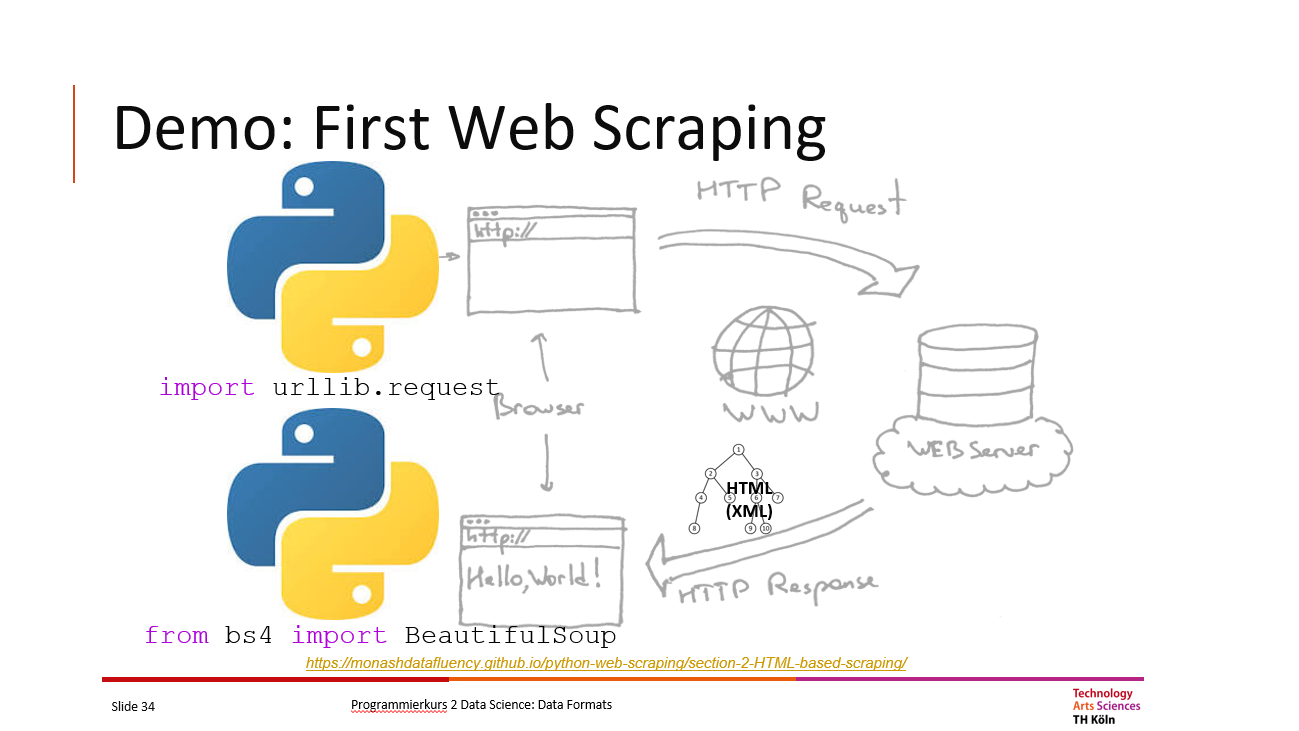

**Beispiel I**: alle Spieler vom BVB Dortmund (einzelne Webseite) extrahieren und parsen

In [5]:
my_url = "https://www.transfermarkt.de/borussia-dortmund/startseite/verein/16"

# here we define the headers for the request
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0'}

# this request object will integrate your URL and the headers defined above
req = urllib.request.Request(url=my_url, headers=headers)

In [ ]:
# calling urlopen this way will automatically handle closing the request
with urllib.request.urlopen(req) as response:
  soup = BeautifulSoup(response.read(), 'html.parser')

print(soup.prettify())

In [11]:
player_arr_bvb = []

club_name = soup.find("h1", {"class":"data-header__headline-wrapper--oswald"}).string.replace("\n", "").replace("  ", "")
club_league = soup.find("span", {"itemprop":"affiliation"}).a.string.string.replace("\n", "").replace("  ", "")

for player in soup.find_all("tr", {"class": ["odd","even"]}):
  #print(player)
  position = player.td['title']
  number = player.td.div.string
  #name = player.find("td", {"itemprop":"athlete"}).string
  name = "ABC"
  dob = player.find_all("td", {"class":"zentriert"})[1].string
  country = player.find("img", {"class":"flaggenrahmen"})['alt']
  value = player.find("td", {"class":"rechts"}).a.string

  player_arr_bvb.append((club_name, club_league, position, number, name, dob, country, value))

In [12]:
len(player_arr_bvb)

28

In [13]:
player_arr_bvb[0:2]

[('Borussia Dortmund',
  'Bundesliga',
  '$data->getPositionDisplay()',
  '1',
  'ABC',
  '06.12.1997 (25)',
  'Schweiz',
  '35,00 Mio. €'),
 ('Borussia Dortmund',
  'Bundesliga',
  '$data->getPositionDisplay()',
  '35',
  'ABC',
  '25.05.2001 (22)',
  'Deutschland',
  '1,50 Mio. €')]

In [ ]:
np_player_arr_bvb = np.asarray(player_arr_bvb)
np_player_arr_bvb

In [16]:
df1 = pd.DataFrame(np_player_arr_bvb, columns = ["club_name", "club_league", "player_position", "player_number", "player_name", "player_dob", "player_country", "player_value"])

In [17]:
df1.head(5)

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,$data->getPositionDisplay(),1,ABC,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,$data->getPositionDisplay(),35,ABC,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,$data->getPositionDisplay(),33,ABC,13.04.1991 (32),Deutschland,"1,00 Mio. €"
3,Borussia Dortmund,Bundesliga,$data->getPositionDisplay(),4,ABC,01.12.1999 (23),Deutschland,"40,00 Mio. €"
4,Borussia Dortmund,Bundesliga,$data->getPositionDisplay(),25,ABC,03.09.1995 (28),Deutschland,"30,00 Mio. €"


In [ ]:
df1.to_csv(r'/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/FHDTM-P2DS-WS2324-Project-Demo-1.1-Data-Acquisition-Transfermarkt_BVB', index=False)

**Beispiel II**: alle Spieler und Vereinsinformationen von den 100 besten Fußballvereinen (mehrere Websites) extrahieren und parsen

In [18]:
with open('/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/Top_100_Vereine.html', "r", encoding='utf-8') as file:
    top_clubs_dom = BeautifulSoup(file.read(), 'html.parser')

In [ ]:
#alternative location
#https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2324/main/Data%20Science%20Projekt%20Demo/Datens%C3%A4tze/Top_100_Vereine.html

In [ ]:
print(top_clubs_dom.prettify())

In [20]:
my_urls = [];
for club in top_clubs_dom.find_all("td",{"class":"hauptlink"}):
  my_urls.append("https://www.transfermarkt.de" + club.a["href"])

In [21]:
my_urls

['https://www.transfermarkt.de/manchester-city/startseite/verein/281',
 'https://www.transfermarkt.de/fc-arsenal/startseite/verein/11',
 'https://www.transfermarkt.de/fc-paris-saint-germain/startseite/verein/583',
 'https://www.transfermarkt.de/real-madrid/startseite/verein/418',
 'https://www.transfermarkt.de/fc-chelsea/startseite/verein/631',
 'https://www.transfermarkt.de/fc-bayern-munchen/startseite/verein/27',
 'https://www.transfermarkt.de/manchester-united/startseite/verein/985',
 'https://www.transfermarkt.de/fc-barcelona/startseite/verein/131',
 'https://www.transfermarkt.de/tottenham-hotspur/startseite/verein/148',
 'https://www.transfermarkt.de/fc-liverpool/startseite/verein/31',
 'https://www.transfermarkt.de/newcastle-united/startseite/verein/762',
 'https://www.transfermarkt.de/aston-villa/startseite/verein/405',
 'https://www.transfermarkt.de/ac-mailand/startseite/verein/5',
 'https://www.transfermarkt.de/ssc-neapel/startseite/verein/6195',
 'https://www.transfermarkt.de

In [22]:
import aiohttp
import asyncio
import nest_asyncio
import random
nest_asyncio.apply()

In [23]:
async def fetch_url(session, url):
    async with session.get(url) as response:
        return await response.text()

async def fetch_and_parse(url, headers):
    async with aiohttp.ClientSession(trust_env=True) as session:
        html_content = await fetch_url(session, url)
        return BeautifulSoup(html_content, 'html.parser')

async def main():

    agents = [{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0'},
              {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'},
              {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}]

    tasks = []
    for my_url in my_urls:
        task = asyncio.create_task(fetch_and_parse(my_url, agents[ random.randint(0, 2)]))
        tasks.append(task)

    league_array = await asyncio.gather(*tasks)
    return league_array

if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    club_doms = loop.run_until_complete(main())

In [ ]:
print(len(club_doms))
print(club_doms[99].prettify())

In [26]:
player_arr = []

for club_dom in club_doms:
  if(club_dom is None):
    continue;

  club_name = club_dom.find("h1", {"class":"data-header__headline-wrapper--oswald"}).string.replace("\n", "").replace("  ", "")
  club_details = club_dom.find("div", {"class":"data-header__details"}).find_all("li")
  club_number_player = club_details[0].span.string.replace("\n", "").replace("  ", "")
  club_avg_age = club_details[1].span.string.replace("\n", "").replace("  ", "")
  club_number_foreign_players = club_details[2].span.a.string.replace("\n", "").replace("  ", "")
  club_number_national_players = club_details[3].span.a.string.replace("\n", "").replace("  ", "")
  club_stadium = club_details[4].span.a.string.replace("\n", "").replace("  ", "")
  club_stadium_seats = club_details[4].find("span", {"class":"tabellenplatz"}).string.replace("\n", "").replace("  ", "")
  club_current_transfer_balance = club_details[5].span.a.string.replace("\n", "").replace("  ", "")

  #Null value extraction handling for club_league
  if(club_dom.find("span", {"itemprop":"affiliation"}) is None):
    club_league = np.NaN
  else:
    club_league = club_dom.find("span", {"itemprop":"affiliation"}).a.string.replace("\n", "").replace("  ", "")

  for player in club_dom.find_all("tr", {"class": ["odd","even"]}):

    #print(player.prettify())
    position = player.td['title']
    number = player.td.div.string
    name = "ABC"
    #name = player.find("td", {"itemprop":"athlete"}).string
    dob = player.find_all("td", {"class":"zentriert"})[1].string
    country = player.find("img", {"class":"flaggenrahmen"})['alt']

    #Null value extraction handling for player_value
    if(player.find("td", {"class":"rechts"}).a is None):
      value = np.NaN
    else:
      value = player.find("td", {"class":"rechts"}).a.string

    player_arr.append((club_name, club_number_player, club_avg_age, club_league, club_number_foreign_players, club_number_national_players,
                       club_stadium, club_stadium_seats, club_current_transfer_balance, position, number, name, dob, country, value))

In [27]:
len(player_arr)

2766

In [ ]:
np_player_arr = np.asarray(player_arr)
np_player_arr

array([['Manchester City', '27', '26,3', ..., '17.08.1993 (29)',
        'Brasilien', '40,00 Mio. €'],
       ['Manchester City', '27', '26,3', ..., '06.11.1992 (30)',
        'Deutschland', '9,00 Mio. €'],
       ['Manchester City', '27', '26,3', ..., '02.04.1995 (28)',
        'Vereinigte Staaten', '3,50 Mio. €'],
       ...,
       ['AZ Alkmaar', '31', '23,0', ..., '31.03.2003 (20)', 'Türkei',
        '600 Tsd. €'],
       ['AZ Alkmaar', '31', '23,0', ..., '28.01.2004 (19)',
        'Niederlande', '600 Tsd. €'],
       ['AZ Alkmaar', '31', '23,0', ..., '27.01.1999 (24)',
        'Niederlande', '350 Tsd. €']], dtype='<U48')

In [ ]:
df2 = pd.DataFrame(np_player_arr, columns = ["club_name", "club_number_player", "club_avg_age", "club_league", "club_number_foreign_players", "club_number_national_players",
                                            "club_stadium", "club_stadium_seats", "club_current_transfer_balance", "player_position", "player_number", "player_name", "player_dob", "player_country", "player_value"])

In [ ]:
df2.head(100)

,club_name,club_number_player,club_avg_age,club_league,club_number_foreign_players,club_number_national_players,club_stadium,club_stadium_seats,club_current_transfer_balance,player_position,player_number,player_name,player_dob,player_country,player_value
0,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €",Torwart,31,Ederson,17.08.1993 (29),Brasilien,"40,00 Mio. €"
1,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €",Torwart,18,Stefan Ortega,06.11.1992 (30),Deutschland,"9,00 Mio. €"
2,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €",Torwart,13,Zack Steffen,02.04.1995 (28),Vereinigte Staaten,"3,50 Mio. €"
3,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €",Torwart,33,Scott Carson,03.09.1985 (37),England,200 Tsd. €
4,Manchester City,27,"26,3",Premier League,17,19,Etihad Stadium,55.017 Plätze,"-79,10 Mio. €",Abwehr,3,Rúben Dias,14.05.1997 (26),Portugal,"80,00 Mio. €"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €",Sturm,7,Kylian Mbappé,20.12.1998 (24),Frankreich,"180,00 Mio. €"
96,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €",Sturm,9,Gonçalo Ramos,20.06.2001 (22),Portugal,"50,00 Mio. €"
97,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €",Sturm,44,Hugo Ekitiké,20.06.2002 (21),Frankreich,"20,00 Mio. €"
98,FC Paris Saint-Germain,39,"25,3",Ligue 1,27,22,Parc des Princes,49.691 Plätze,"-128,00 Mio. €",Sturm,39,Ilyes Housni,14.05.2005 (18),Frankreich,"3,50 Mio. €"


In [ ]:
df2.to_csv(r'/content/drive/MyDrive/WS23_24 PhD/FHDTM-P2DS-WS2324/Data Science Projekt Demo/Datensätze/FHDTM-P2DS-WS2324-Project-Demo-1.2-Data-Acquisition-Transfermarkt_Top_100', index=False)